In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.cm as cam
import numpy as np
import pandas as pd
import os
import math

In [3]:
file = r'D:\UNI\MILJOETEK\4. semester\Calculations\Data.xlsx'
sheet = 'FU break even holistic'
save_dir = r'D:\UNI\MILJOETEK\4. semester\Calculations\Cost'
# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)
data = pd.read_excel(file, sheet_name=sheet)
#data.head()

operation = data['Operations']
emissions_MDU = data['Emissions MDU']
emissions_MDU_base = data['Emissions (no MDU)']
emissions_CDU = data['Emissions CDU']
emissions_CDU_base = data['Emissions (no CDU)']


In [13]:
plot_legend = ['MDU',
                   'CDU/10',
                   'No DU']


C:\Users\rwint\AppData\Local\Temp\ipykernel_17116\3514272646.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20')


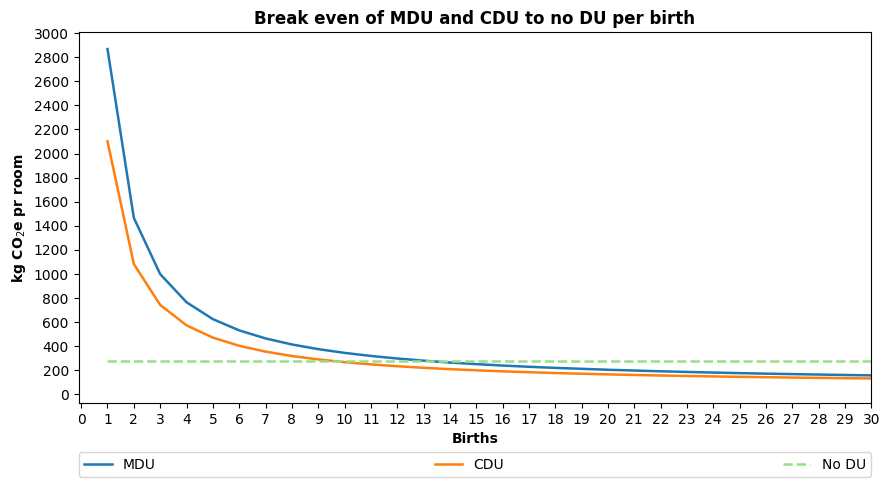

In [5]:
#fig, ax = plt.subplots()
cmap = plt.cm.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1.5, 12)]

plt.subplots(figsize=(9, 5))
plt.plot(operation,emissions_MDU, color = colors[0],linewidth=1.8)
plt.plot(operation,emissions_CDU, color = colors[1], linewidth=1.8)
plt.plot(operation,emissions_MDU_base, linestyle='dashed', color = colors[2], linewidth=1.8)


plt.ylabel('kg CO$_2$e pr room', weight='bold')
plt.xlabel('Births', weight='bold')

plt.legend(plot_legend, bbox_to_anchor=(0, -0.2, 1, 0.2), loc="lower left",
            mode="expand", borderaxespad=0, ncol=3)
plt.xlim(-0.1,30)
plt.yticks(np.arange(0, 3001, step=200))
plt.xticks(np.arange(0, 31, step=1))

plt.title('Break even of MDU and CDU to no DU per birth', weight='bold')
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'Break_even.jpg'), bbox_inches='tight')

plt.show()



In [8]:
sheet_cost = "Annulized cost"
df_cost = pd.read_excel(file, sheet_name=sheet_cost)


#MDU
MDU_share = df_cost['MDU'].to_list()
MDU_share = MDU_share[:3]

CDU_share = df_cost['CDU'].to_list()
CDU_share = CDU_share[:3]

costs = df_cost['Unnamed: 0'].to_list()
costs = costs[:3]
costs

for i in range(len(CDU_share)):
    CDU_share[i] /= 10

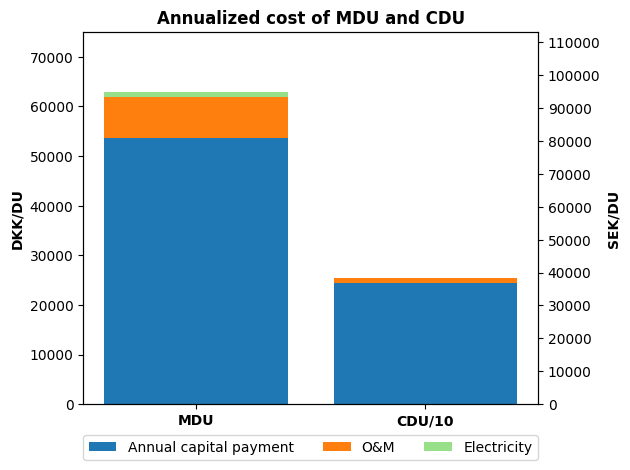

In [15]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Calculate the positions for the bars
x = np.arange(2)

# Plot the stacked bar for MDU
bottom_MDU = np.zeros(len(MDU_share))
for i, (share, item) in enumerate(zip(MDU_share, costs)):
    ax.bar(x[0], share, bottom=bottom_MDU, label=item, color=colors[i])
    bottom_MDU += share


# Plot the stacked bar for CDU
bottom_CDU = np.zeros(len(CDU_share))
for i, (share, item) in enumerate(zip(CDU_share, costs)):
    ax.bar(x[1], share, bottom=bottom_CDU, label=item, color=colors[i])
    bottom_CDU += share
# Add labels, title, and legend

ax.set_ylabel('DKK/DU',weight='bold')
ax.set_title('Annualized cost of MDU and CDU',weight='bold')

ax.set_xticks(x)
plt.ylim(0,75000)
plt.yticks(np.arange(0, 75001, step=10000))

ax2 = ax.twinx()
ax2.set_ylim(0, 75000 * 1.50833)
ax2.set_ylabel('SEK/DU', weight='bold')

# Calculate the secondary y-axis ticks based on the primary y-axis ticks
secondary_yticks = np.arange(0, 75000 * 1.50833, step=10000)
ax2.set_yticks(secondary_yticks)
ax2.set_yticklabels([f'{tick:.0f}' for tick in secondary_yticks])


ax.set_xticklabels(['MDU', 'CDU/10'],weight='bold')
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1,decimals=0))

# Create a custom legend with unique items
handles, labels = ax.get_legend_handles_labels()
unique_labels = sorted(set(labels))  # Get unique items and sort alphabetically
unique_handles = [handles[labels.index(label)] for label in unique_labels]  # Corresponding handles
ax.legend(costs, bbox_to_anchor=(0, -0.15, 1, 0.2), loc="lower left",
            mode="expand", borderaxespad=0, ncol=3)

# Show the plot
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'Annulized_cost.jpg'), bbox_inches='tight')
plt.show()